In [3]:


class CancerDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        image = Image.open(img_path)
        label = int(self.dataframe.iloc[idx, 1])

        if self.transform:
            image = self.transform(image)

        return image, label

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [4]:


# Path to images
imagePath = '/histopathologic-cancer-detection/train'
train_dir = imagePath

# Adding full path to the 'id' column
df_labels['id'] = df_labels['id'].apply(lambda x: os.path.join(train_dir, x))

dataset = CancerDataset(dataframe=df_labels, transform=transform)

#Data loader
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Verify the image data is loaded correctly
for images, labels in loader:
    print(images.shape, labels)
    break


torch.Size([4, 3, 224, 224]) tensor([0, 1, 0, 0])


#### Data Analysis

Malignant cancer involves aggressive cells that grow uncontrollably, invade nearby tissues, and spread to other parts of the body. Benign cancer consists of non-cancerous cells that grow slowly and remain localized, without spreading to other tissues. While benign tumors are generally less harmful, malignant tumors pose significant health risks and require more intensive treatment.

In [5]:
malignant = df_labels.loc[df_labels['label']==1]['id'].values
normal = df_labels.loc[df_labels['label']==0]['id'].values

In [6]:
def plot_fig(ids,title,nrows=3,ncols=3):

    fig,ax = plt.subplots(nrows,ncols,figsize=(7,7))
    plt.subplots_adjust(wspace=0, hspace=0)
    for i,j in enumerate(ids[:nrows*ncols]):
        fname = os.path.join(train_dir ,j )
        img = Image.open(fname)
        idcol = ImageDraw.Draw(img)
        idcol.rectangle(((0,0),(95,95)),outline='white')
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(np.array(img))
        plt.axis('off')

    plt.suptitle(title, y=0.94)

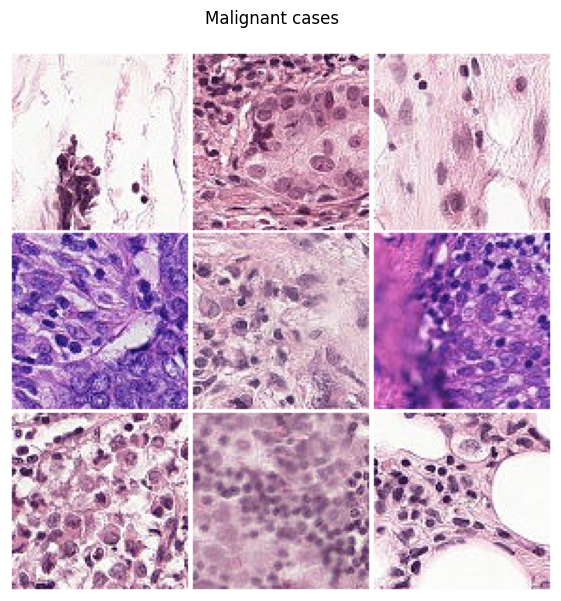

In [7]:
plot_fig(malignant,'Malignant cases')

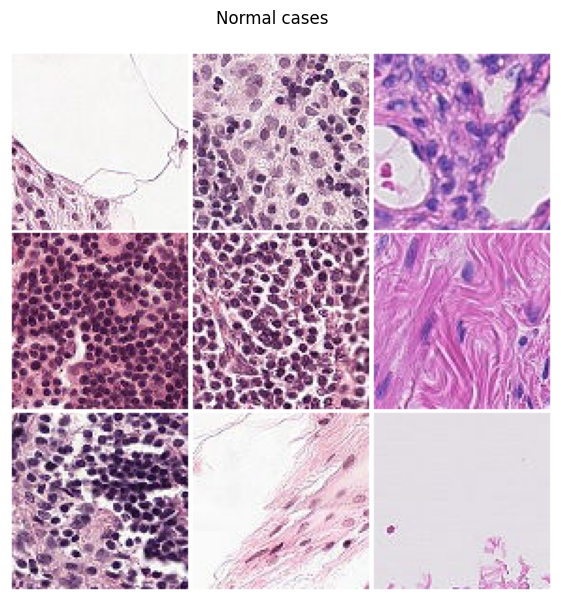

In [8]:
plot_fig(normal,'Normal cases')